# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel(r"C:\Users\CONSULTOR\Documents\VS\Proyecto\CO2WZWHLQ3GpXlr5Rkeq4w_6bb40d853b58401ebd85f554991bc2f1_online_retail\Online Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
pd.DataFrame({'Columnas': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'Duplicados count':df.duplicated().sum()})
            

,Columnas,dtypes,NaN count,Duplicados count
0,InvoiceNo,object,0,5268
1,StockCode,object,0,5268
2,Description,object,1454,5268
3,Quantity,int64,0,5268
4,InvoiceDate,datetime64[ns],0,5268
5,UnitPrice,float64,0,5268
6,CustomerID,float64,135080,5268
7,Country,object,0,5268


In [7]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(401604, 8)

In [9]:
#Creando columna con el ingreso
df["Total"] = df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


ANALISIS EXPLORATORIO 


In [10]:
print(f"Descripcion de los datos: \n{df.describe()}\n")

Descripcion de los datos: 
            Quantity                    InvoiceDate      UnitPrice  \
count  401604.000000                         401604  401604.000000   
mean       12.183273  2011-07-10 12:08:23.848567552       3.474064   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-29 15:40:00       1.950000   
75%        12.000000            2011-10-20 11:58:30       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       250.283037                            NaN      69.764035   

          CustomerID          Total  
count  401604.000000  401604.000000  
mean    15281.160818      20.613638  
min     12346.000000 -168469.600000  
25%     13939.000000       4.250000  
50%     15145.000000      11.700000  
75%     16784.000000      19.800000  
max     18287.000000  168469.600000  
std      1714.006089     430.352218  


In [11]:
top10_cantidad = df.groupby("Description")["Quantity"].sum().nlargest(10)

top10_porcentaje = top10_cantidad / df["Quantity"].sum() * 100

# Crear DataFrame final
top10_productos = pd.DataFrame({
    "Cantidad": top10_cantidad,
    "Porcentaje": top10_porcentaje
})

top10_productos


,Cantidad,Porcentaje
Description,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119,1.085645
JUMBO BAG RED RETROSPOT,44963,0.918953
ASSORTED COLOUR BIRD ORNAMENT,35215,0.719724
WHITE HANGING HEART T-LIGHT HOLDER,34128,0.697507
PACK OF 72 RETROSPOT CAKE CASES,33386,0.682342
POPCORN HOLDER,30492,0.623195
RABBIT NIGHT LIGHT,27045,0.552745
MINI PAINT SET VINTAGE,25880,0.528935
PACK OF 12 LONDON TISSUES,25305,0.517183


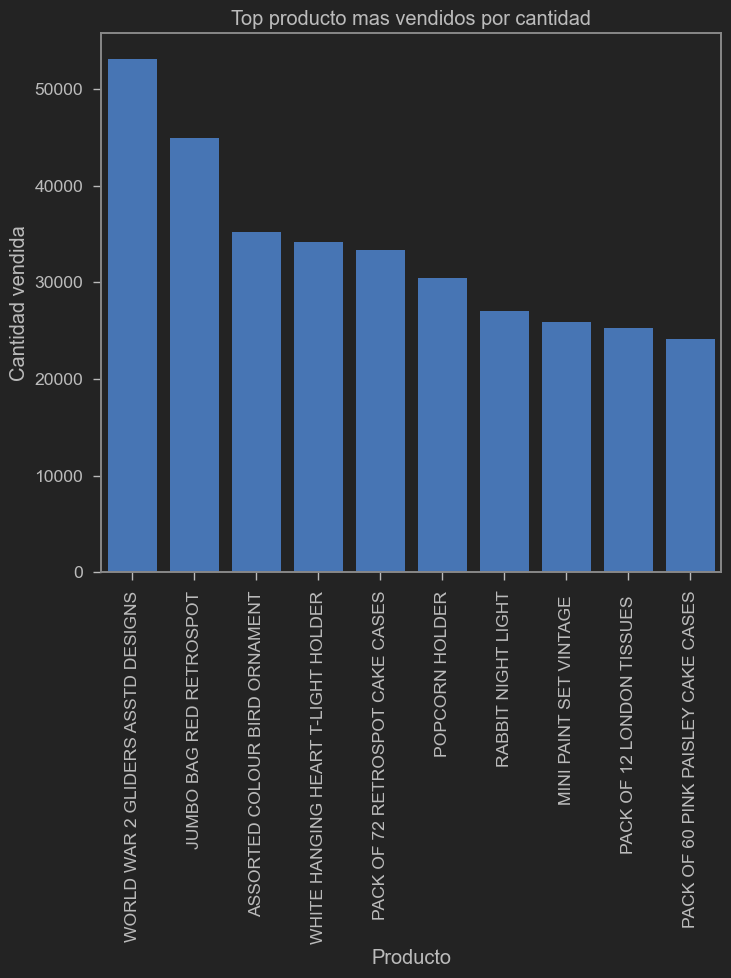

In [12]:

plt.Figure(figsize=(15,6))
sns.barplot(data=top10_productos,x="Description",y="Cantidad")
plt.title("Top producto mas vendidos por cantidad")
plt.ylabel("Cantidad vendida")
plt.xlabel("Producto")
plt.xticks(rotation=90)
plt.show()



El producto líder es "WORLD WAR 2 GLIDERS ASSTD DESIGNS", con más de 50,000 unidades vendidas, destacándose claramente sobre el resto.
El segundo lugar, "JUMBO BAG RED RETROSPOT", tiene aproximadamente 45,000 unidades, lo que representa una diferencia significativa (unos 7,000 unidades menos) respecto al primero.
Hay una caída gradual en las ventas entre los productos del 3° al 10° lugar, todos entre 24,000 y 36,000 unidades.
El producto con menor venta en este top 10 es "PACK OF 60 PINK PAISLEY CAKE CASES", con cerca de 24,000 unidades.

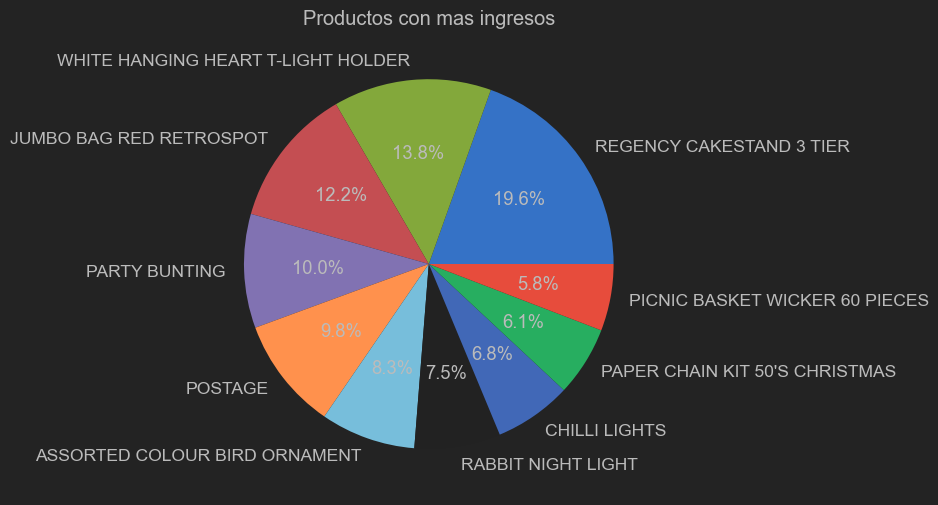

In [13]:
top10_ganancias = df.groupby("Description")["Total"].sum().nlargest(10)
plt.figure(figsize=(8,6))
plt.pie(top10_ganancias, labels=top10_ganancias.index, autopct="%1.1f%%")
plt.title("Productos con mas ingresos")
plt.show()


El producto líder en ingresos es “REGENCY CAKESTAND 3 TIER”, con un 19.6% del total, lo que lo convierte en el motor principal de ingresos.
Le sigue “WHITE HANGING HEART T-LIGHT HOLDER” con 13.8%, y luego “JUMBO BAG RED RETROSPOT” con 12.2%. Estos tres productos juntos representan más del 45% de los ingresos totales.
El resto de productos tienen contribuciones menores, entre 5.8% y 10%, siendo el menor “PICNIC BASKET WICKER 60 PIECES” (5.8%).
No hay un producto dominante absoluto como en ventas por cantidad (donde uno tenía >50K unidades), pero sí una concentración fuerte en los 3 primeros.

In [14]:
top10_paises=pd.DataFrame({"Cantidad":df["Country"].value_counts().nlargest(10),
              "Porcentaje":(df["Country"].value_counts(normalize=True) * 100).head(10).round(2)
})
top10_paises

,Cantidad,Porcentaje
Country,,
United Kingdom,356728,88.83
Germany,9480,2.36
France,8475,2.11
EIRE,7475,1.86
Spain,2528,0.63
Netherlands,2371,0.59
Belgium,2069,0.52
Switzerland,1877,0.47
Portugal,1471,0.37


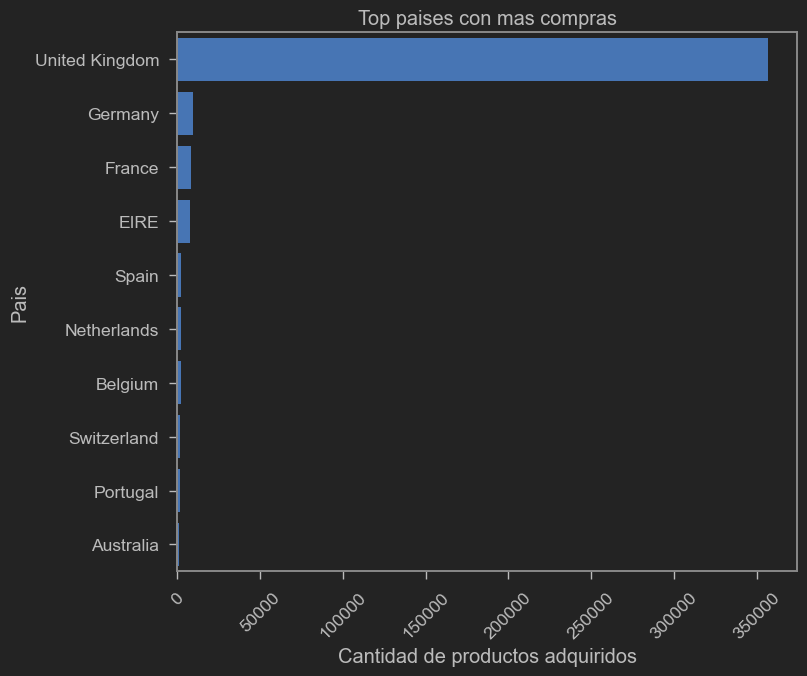

In [15]:

plt.Figure(figsize=(15,6))
sns.barplot(data=top10_paises,y="Country",x="Cantidad")
plt.title("Top paises con mas compras")
plt.ylabel("Pais")
plt.xlabel("Cantidad de productos adquiridos")
plt.xticks(rotation=45)
plt.show()


El Reino Unido (United Kingdom) domina completamente el mercado, con más de 350,000 productos adquiridos, lo que representa una cifra muchísimo mayor que cualquier otro país.
Los siguientes países Alemania, Francia, EIRE tienen volúmenes de compra muy inferiores, apenas superando los 15,000–30,000 productos.
Hay una caída drástica en volumen después del Reino Unido: el segundo país (Alemania) tiene aproximadamente 1/10 de las compras del primero.
Países como España, Países Bajos, Bélgica y Suiza aparecen con volúmenes muy bajos, casi insignificantes frente al Reino Unido.
Australia y Portugal están prácticamente en el fondo, con menos de 5,000 productos adquiridos.

¿Cúal es el producto con más ganancia?


In [16]:
Total_maxprodc=df.groupby("Description")["Total"].sum().max()
product_max= df.groupby("Description")["Total"].sum().idxmax()
print(f"El producto que recaudó más ganancia es {product_max} con un total de {Total_maxprodc:,.2f}")

El producto que recaudó más ganancia es REGENCY CAKESTAND 3 TIER con un total de 132,567.70


¿Qué país gasto más?

In [17]:
grouped = df.groupby(["Country", "Description"])["Total"].sum()

idx_max = grouped.idxmax()   
Total_max = grouped.max()

country_max, product_max = idx_max

print(f"El producto que recaudó más ganancia fue '{product_max}' en {country_max}, con un total de {Total_max:,.2f}")


El producto que recaudó más ganancia fue 'REGENCY CAKESTAND 3 TIER' en United Kingdom, con un total de 102,871.15


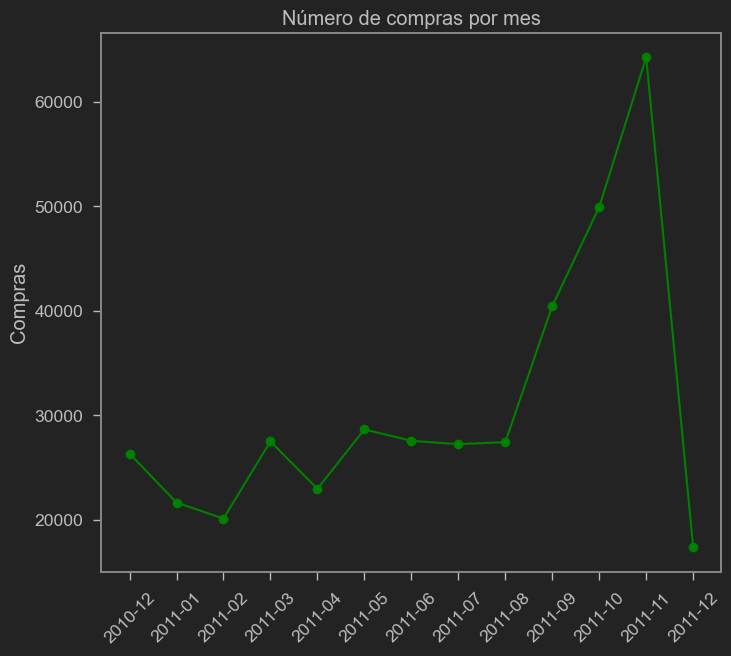

In [18]:
df['Mes'] = df['InvoiceDate'].dt.to_period('M')  
compras_por_mes = df.groupby('Mes').size()
compras_por_mes= compras_por_mes.sort_index()
compras_por_mes = (
    df.groupby('Mes')
    .size()
    .reset_index(name='NumeroCompras')
    .sort_values('Mes')
)
plt.plot(compras_por_mes["Mes"].astype("str"),compras_por_mes["NumeroCompras"],marker='o', color="green")
plt.title('Número de compras por mes')
plt.ylabel('Compras')
plt.xticks(rotation=45)
plt.show()

Hay una tendencia general ascendente en el número de compras a lo largo del año 2011, con un crecimiento significativo a partir de agosto.
El punto más bajo ocurre en febrero de 2011 (cerca de 20,000 compras), seguido de una recuperación gradual.
A partir de agosto de 2011, se observa un crecimiento acelerado: las compras suben de ~28,000 en agosto a más de 60,000 en noviembre.
El pico máximo se alcanza en noviembre de 2011 (más de 60,000 compras), lo que sugiere una fuerte temporada alta —posiblemente relacionada con compras navideñas o promociones de fin de año.
En diciembre de 2011, hay una caída drástica a menos de 20,000 compras.

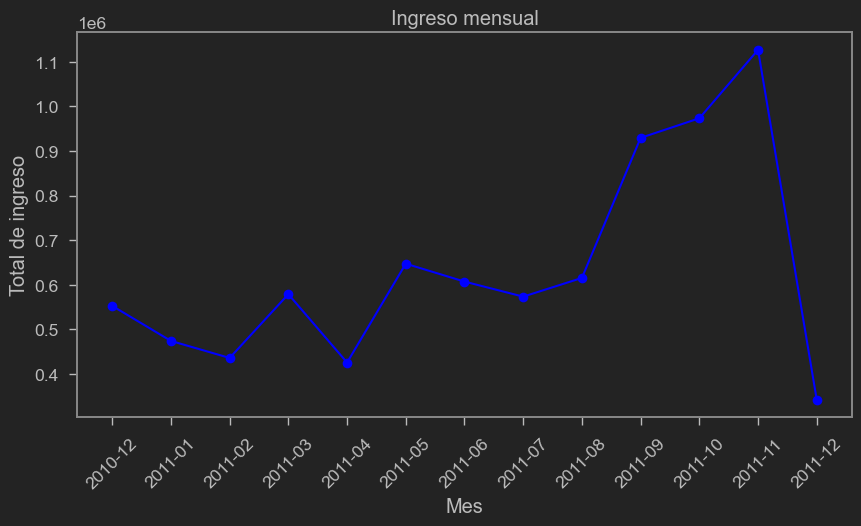

In [19]:

df['Mes'] = df['InvoiceDate'].dt.to_period('M')

# Agrupar por mes y sumar el total de compras
ganancia = (
    df.groupby('Mes')['Total']
    .sum()
    .reset_index()
)


plt.figure(figsize=(10,5))
plt.plot(ganancia["Mes"].astype("str"),ganancia["Total"],marker='o',color="blue")
plt.title('Ingreso mensual')
plt.xlabel('Mes')
plt.ylabel('Total de ingreso')
plt.xticks(rotation=45)
plt.show()


El ingreso mensual fluctúa entre 400,000 y 1,100,000.
Hay una tendencia general ascendente durante 2011, con un crecimiento acelerado a partir de agosto.
El punto más bajo ocurre en abril de 2011 (~420,000), seguido de una recuperación gradual.
A partir de agosto de 2011, se observa un fuerte aumento: los ingresos suben de ~600,000 a más de 1,100,000 en noviembre.
El pico máximo se alcanza en noviembre de 2011 (cerca de 1.12 millones), lo que sugiere una temporada alta muy exitosa, probablemente relacionada con compras navideñas o promociones de fin de año.
En diciembre de 2011, hay una caída abrupta a menos de 350,000, similar a lo observado en la gráfica de “Número de compras por mes”. 

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Mes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


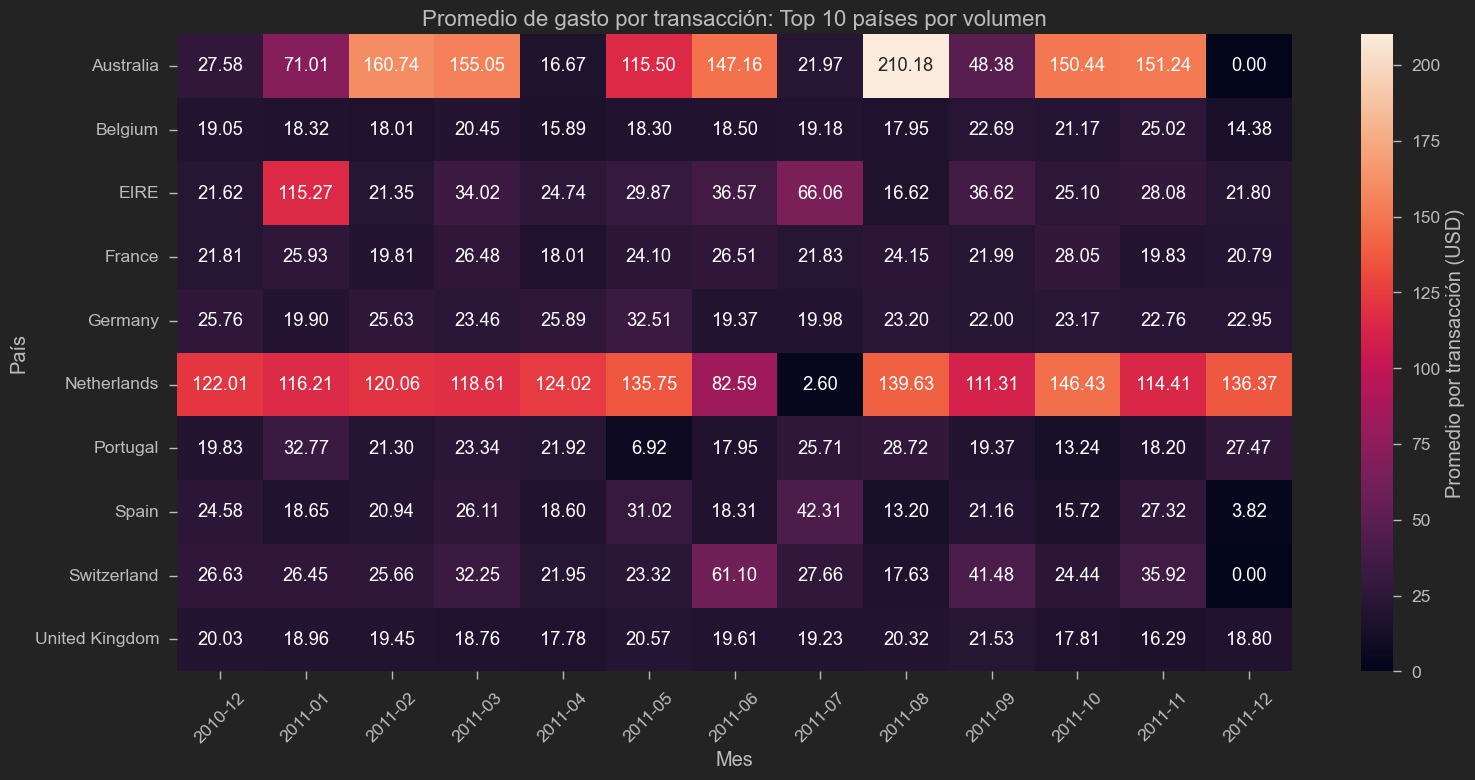

In [21]:

df['Mes'] = df['InvoiceDate'].dt.to_period('M').astype(str)

top_10_paises = df['Country'].value_counts().head(10).index


df_top = df[df['Country'].isin(top_10_paises)]


heatmap_data = df_top.groupby(['Country', 'Mes'])['Total'].mean().unstack(fill_value=0)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True,  fmt=".2f",cbar_kws={'label': 'Promedio por transacción (USD)'})

plt.title('Promedio de gasto por transacción: Top 10 países por volumen', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('País')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Países con mayor promedio de gasto
Netherlands (Países Bajos) destaca claramente como el país con el promedio más alto de gasto por transacción, especialmente en Agosto de 2011 (139.63) y octubre (146.43).
Otros países con valores altos: Australia hasta 210.18 U agosto y EIRE 115.27 en Enero.
Variación mensual significativa
Algunos países muestran picos estacionales: por ejemplo, Países Bajos tiene un aumento notable en octubre-noviembre.
Australia tiene un pico muy alto en agosto (210.18), lo cual podría indicar una campaña o producto específico de alto valor en ese mes.
Países con bajo promedio constante
United Kingdom (Reino Unido), aunque es el líder en volumen de compras, tiene un promedio relativamente bajo (entre 16–22), lo que sugiere que vende muchos productos de bajo costo.
Spain y Portugal también mantienen promedios bajos, con picos menores.
Meses con comportamiento atípico
Diciembre de 2011 muestra valores muy bajos o cero en algunos países (ej. Australia, Suiza).

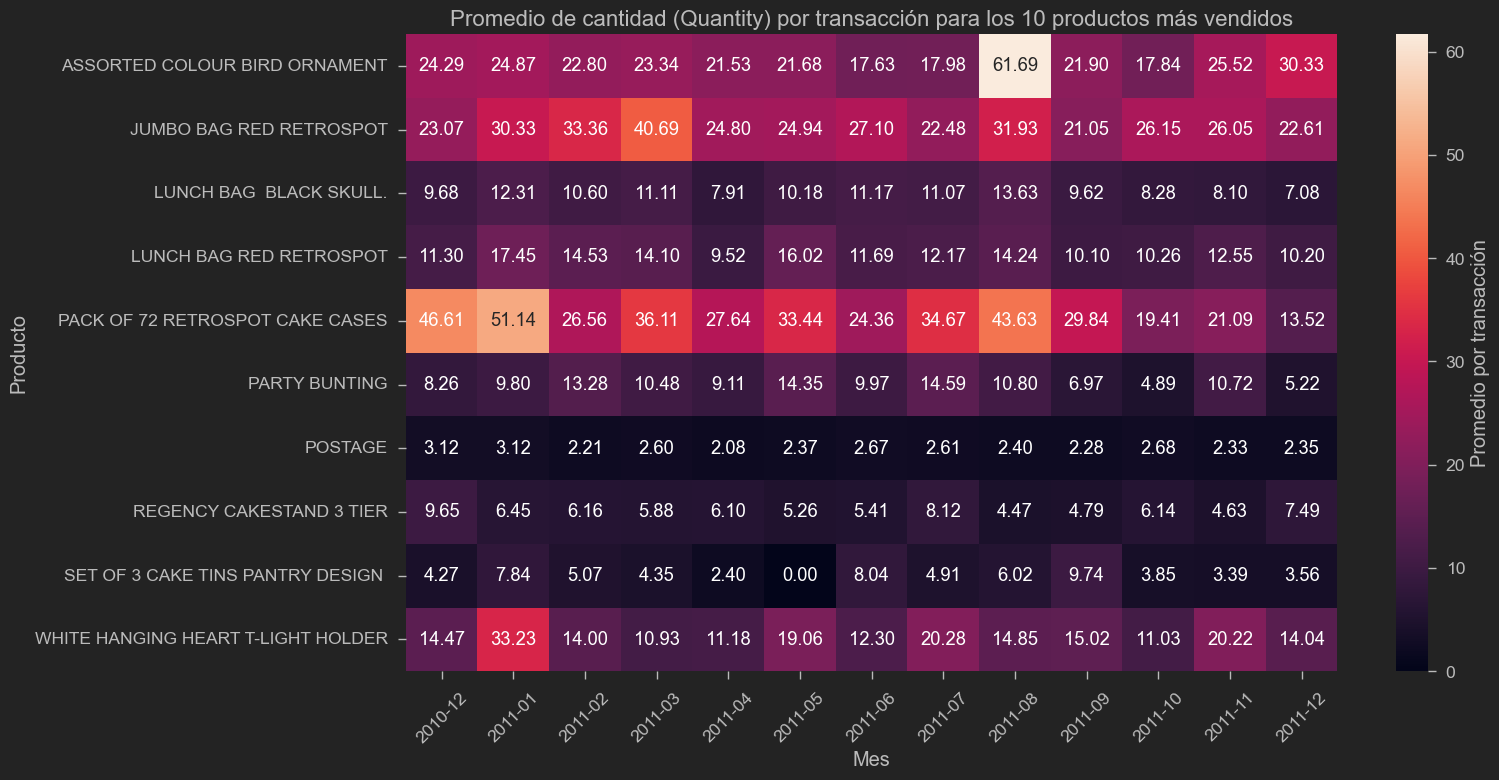

In [22]:
df['Mes'] = df['InvoiceDate'].dt.to_period('M').astype(str)

top_10_produc = df['Description'].value_counts().head(10).index
df_top = df[df['Description'].isin(top_10_produc)]


heatmap_data = df_top.groupby(['Description', 'Mes'])['Quantity'].mean().unstack(fill_value=0)


plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data,annot=True,fmt=".2f",cbar_kws={'label': 'Promedio por transacción'})

plt.title('Promedio de cantidad (Quantity) por transacción para los 10 productos más vendidos', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Producto')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Productos con mayor cantidad por transacción
“PACK OF 72 RETROSPOT CAKE CASES” es el producto con el promedio más alto de cantidad por transacción, especialmente en enero de 2011 (51.14 unidades) y diciembre de 2010 (46.61).
Esto tiene sentido: es un producto que se vende en paquetes grandes (72 unidades), por lo que los clientes tienden a comprarlo en cantidades altas por transacción.
Variación mensual significativa
Algunos productos muestran picos estacionales:
“JUMBO BAG RED RETROSPOT”: pico en marzo (40.69).
“WHITE HANGING HEART T-LIGHT HOLDER”: pico en Enero (33.23).
“ASSORTED COLOUR BIRD ORNAMENT”: pico en agosto (61.69) muy alto
 
Productos con bajo promedio constante
“POSTAGE” tiene un promedio muy bajo y estable (2–3 unidades por transacción).

“SET OF 3 CAKE TINS PANTRY DESIGN” también mantiene valores bajos (entre 2–8 unidades), sugiriendo que se compra individualmente o en pequeñas cantidades.
Meses con comportamiento atípico
Diciembre de 2011 muestra valores más bajos en muchos productos, posiblemente por:
Compras de regalos individuales (menos unidades por transacción).

